# Entrenamiento & Evaluación

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import pickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from imblearn.under_sampling import RandomUnderSampler
import numpy as np
from collections import Counter
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [4]:
pd.set_option('future.no_silent_downcasting', True)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Bootcamp_DS/ML/data/train_with_features.csv")
df_genres =  pd.read_csv("/content/drive/MyDrive/Bootcamp_DS/ML/data/genres.csv")
df = df.copy().drop(columns=["song_id","filename", "filepath", 'Chroma_1', 'Chroma_2', 'Chroma_3', 'Chroma_4',
       'Chroma_5', 'Chroma_6', 'Chroma_7', 'Chroma_8', 'Chroma_9', 'Chroma_10',
       'Chroma_11', 'Chroma_12', 'Spectral_contrast_1', 'Spectral_contrast_2',
       'Spectral_contrast_3', 'Spectral_contrast_4', 'Spectral_contrast_5',
       'Spectral_contrast_6', 'Spectral_contrast_7', 'Zero_crossing_rate',
       'Spectral_Rolloff', 'Tempo'])

In [ ]:
df.head()

,genre_id,genre,MFCC_1,MFCC_2,MFCC_3,MFCC_4,MFCC_5,MFCC_6,MFCC_7,MFCC_8,...,MFCC_11,MFCC_12,MFCC_13,MFCC_14,MFCC_15,MFCC_16,MFCC_17,MFCC_18,MFCC_19,MFCC_20
0,7.0,Instrumental,-211.066559,100.593956,42.598457,23.165283,2.860841,18.102251,-14.843862,9.617244,...,1.383807,-0.954104,-0.424609,2.930789,1.142149,-5.260527,3.911721,-3.118353,3.531898,4.903169
1,2.0,Punk,-14.467098,99.263069,-2.664984,26.246733,2.537334,13.499779,4.049285,13.555771,...,-3.182864,2.670346,-4.157828,-1.427059,-5.992962,-2.554197,-8.692637,-0.044264,-7.512719,-0.651457
2,5.0,Folk,-317.806274,90.202530,-36.330082,18.486454,-25.418125,-5.020282,-7.958361,-12.780191,...,-18.698023,-9.699656,-11.490185,-17.160065,-15.421208,-11.540291,6.645436,8.064914,3.898278,3.883015
3,12.0,Old-Time / Historic,-264.162598,143.274414,-109.257156,-26.363281,-6.620979,-39.883110,-30.219675,-19.228388,...,-14.553981,-5.271422,-13.570509,-0.129010,8.321633,-9.815311,15.549283,17.530434,-11.841340,6.789664
4,1.0,Rock,2.097910,85.692604,-1.235375,24.334158,1.336215,9.044332,-8.041906,10.779317,...,-6.963677,4.131877,-3.015029,-1.620542,-4.801994,-0.453704,-6.365971,1.639646,-2.654665,2.383693


In [ ]:
df_genres

,genre,genre_id
0,Electronic,0
1,Rock,1
2,Punk,2
3,Experimental,3
4,Hip-Hop,4
5,Folk,5
6,Chiptune / Glitch,6
7,Instrumental,7
8,Pop,8
9,International,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genre_id  19896 non-null  float64
 1   genre     19896 non-null  object 
 2   MFCC_1    19896 non-null  float64
 3   MFCC_2    19896 non-null  float64
 4   MFCC_3    19896 non-null  float64
 5   MFCC_4    19896 non-null  float64
 6   MFCC_5    19896 non-null  float64
 7   MFCC_6    19896 non-null  float64
 8   MFCC_7    19896 non-null  float64
 9   MFCC_8    19896 non-null  float64
 10  MFCC_9    19896 non-null  float64
 11  MFCC_10   19896 non-null  float64
 12  MFCC_11   19896 non-null  float64
 13  MFCC_12   19896 non-null  float64
 14  MFCC_13   19896 non-null  float64
 15  MFCC_14   19896 non-null  float64
 16  MFCC_15   19896 non-null  float64
 17  MFCC_16   19896 non-null  float64
 18  MFCC_17   19896 non-null  float64
 19  MFCC_18   19896 non-null  float64
 20  MFCC_19   19896 non-null  fl

In [ ]:
df["genre"].value_counts().index

Index(['Rock', 'Electronic', 'Punk', 'Experimental', 'Hip-Hop', 'Folk',
       'Chiptune / Glitch', 'Instrumental', 'Pop', 'International',
       'Ambient Electronic', 'Classical', 'Old-Time / Historic', 'Jazz',
       'Country', 'Soul-RnB', 'Spoken', 'Blues', 'Easy Listening'],
      dtype='object', name='genre')

## Aproximación 0
Transformarlo en un problema binario.

Musica de estudio vs música digital

In [43]:
df_0 = df.copy().drop(columns="genre_id")

In [44]:
genre_mapping = {
    # 0 - Muúsica digital'
    'Electronic': 0,
    'Ambient Electronic': 0,
    'Chiptune / Glitch': 0,


    # 1 - Música de estudio
    'Rock': 1,
    'Pop': 1,
    'Punk': 1,
    'Soul-RnB': 1,
    'Blues': 1,
    'Easy Listening': 1,
    'Classical': 1,
    'Folk': 1,
    'Country': 1,
    'Old-Time / Historic': 1,
    'Jazz': 1,

    # Géneros descartados
    'Hip-Hop': None,
    'International': None,
    'Spoken': None,
    'Experimental': None,
    'Instrumental': None
}

In [45]:
df_0['genre'] = df['genre'].replace(genre_mapping).astype("Int64")
df_0 = df_0.dropna(subset=['genre'])

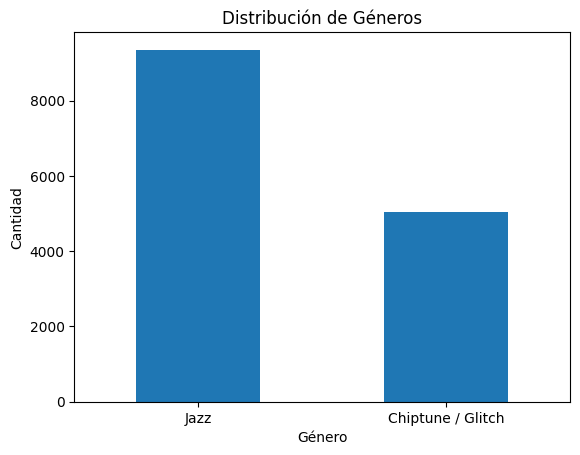

In [46]:
# Invertir el diccionario para mapear los números a los nombres
genre_labels = {v: k for k, v in genre_mapping.items()}

# Contar las ocurrencias por género numérico
genre_counts = df_0["genre"].value_counts()

# Reemplazar los números por nombres en el índice
genre_counts.index = genre_counts.index.map(genre_labels)

# Graficar
genre_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.title("Distribución de Géneros")
plt.show()

In [ ]:
# Definir X e y
X_0 = df_0.drop(columns=["genre"])
y_0 = df_0["genre"]

# Dividir datos en entrenamiento y prueba
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=41)

print(X_train_0.shape)
print(X_test_0.shape)
print(y_train_0.shape)
print(y_test_0.shape)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled_0 = scaler.fit_transform(X_train_0)
X_test_scaled_0 = scaler.transform(X_test_0)

(11516, 20)
(2879, 20)
(11516,)
(2879,)


### Catboost

In [ ]:
# Definir el modelo CatBoostClassifier
catboost_0 = CatBoostClassifier(
    iterations=500,           # Número de iteraciones
    depth=10,                  # Profundidad de los árboles
    learning_rate=0.05,       # Tasa de aprendizaje
    loss_function='Logloss',  # Función de pérdida para clasificación binaria
    eval_metric='AUC',        # Métrica de evaluación AUC
    verbose=50                # Muestra progreso cada 50 iteraciones
)
cv_catboost_0 = cross_val_score(catboost_0, X_train_scaled_0, y_train_0, cv=5, scoring="accuracy")

print("Accuracy en cada fold:", cv_catboost_0)
print("Accuracy media:", cv_catboost_0.mean())

0:	total: 53.6ms	remaining: 26.7s
50:	total: 2.88s	remaining: 25.3s
100:	total: 5.72s	remaining: 22.6s
150:	total: 12.1s	remaining: 28.1s
200:	total: 16s	remaining: 23.8s
250:	total: 18.8s	remaining: 18.7s
300:	total: 22.3s	remaining: 14.7s
350:	total: 26.4s	remaining: 11.2s
400:	total: 29.2s	remaining: 7.2s
450:	total: 31.9s	remaining: 3.47s
499:	total: 34.6s	remaining: 0us
0:	total: 84ms	remaining: 41.9s
50:	total: 4.84s	remaining: 42.6s
100:	total: 7.61s	remaining: 30.1s
150:	total: 10.4s	remaining: 24s
200:	total: 13.3s	remaining: 19.7s
250:	total: 17.6s	remaining: 17.5s
300:	total: 20.7s	remaining: 13.7s
350:	total: 23.6s	remaining: 10s
400:	total: 26.3s	remaining: 6.5s
450:	total: 29.8s	remaining: 3.23s
499:	total: 33.8s	remaining: 0us
0:	total: 193ms	remaining: 1m 36s
50:	total: 3.19s	remaining: 28.1s
100:	total: 6s	remaining: 23.7s
150:	total: 9.36s	remaining: 21.6s
200:	total: 13.5s	remaining: 20.1s
250:	total: 16.3s	remaining: 16.2s
300:	total: 19.2s	remaining: 12.7s
350:	tot

0:	total: 72.5ms	remaining: 36.2s
50:	total: 3.38s	remaining: 29.8s
100:	total: 6.84s	remaining: 27s
150:	total: 12s	remaining: 27.6s
200:	total: 15.3s	remaining: 22.7s
250:	total: 18.6s	remaining: 18.5s
300:	total: 22.8s	remaining: 15.1s
350:	total: 27.2s	remaining: 11.6s
400:	total: 30.5s	remaining: 7.53s
450:	total: 33.8s	remaining: 3.67s
499:	total: 38.8s	remaining: 0us
Accuracy:  0.8291073289336576
              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75      1038
         1.0       0.85      0.89      0.87      1841

    accuracy                           0.83      2879
   macro avg       0.82      0.81      0.81      2879
weighted avg       0.83      0.83      0.83      2879



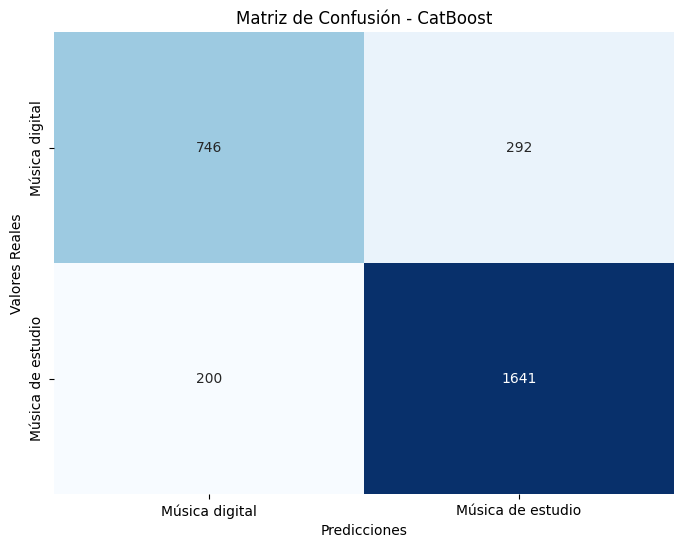

In [ ]:
# Entrenar el modelo
catboost_0.fit(X_train_scaled_0, y_train_0)

# Hacer predicciones
pred_catboost_0 = catboost_0.predict(X_test_scaled_0)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test_0, pred_catboost_0))
print(metrics.classification_report(y_test_0, pred_catboost_0))

# Matriz de confusión
cm_catboost_0 = metrics.confusion_matrix(y_test_0, pred_catboost_0)
labels = ['Música digital', 'Música de estudio']
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost_0, xticklabels=labels, annot=True, fmt='d', cmap='Blues', cbar=False, yticklabels=labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - CatBoost")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/binary_model.pkl"

pickle.dump(catboost_0, open(filename, 'wb'))

## Aproximación 1
Utilizar 9 géneros con mayor número de muestras

In [ ]:
df_1 = df[df["genre"].isin(['Rock', 'Electronic', 'Punk', 'Experimental', 'Hip-Hop', 'Folk',
       'Chiptune / Glitch', 'Instrumental', 'Pop'])]

In [ ]:
# Definir las etiquetas de los géneros
genre_labels = [
    "Electronic", "Rock", "Punk", "Experimental", "Hip-Hop",
    "Folk", "Chiptune / Glitch", "Instrumental", "Pop"
]

In [ ]:
# Definir X e y
X = df_1.drop(columns=['genre_id', "genre"])
y = df_1["genre_id"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(13344, 20)
(3336, 20)
(13344,)
(3336,)


### Catboost

In [ ]:
catboost = CatBoostClassifier(
    iterations=200,       # Número de iteraciones
    depth=10,              # Profundidad de los árboles
    learning_rate=0.05,   # Tasa de aprendizaje
    loss_function='MultiClass',  # Para clasificación multiclase
    eval_metric='Accuracy',
    verbose=50            # Muestra progreso cada 50 iteraciones
)

cv_catboost = cross_val_score(catboost, X_train_scaled, y_train, cv=3, scoring="accuracy")

print("Accuracy en cada fold:", cv_catboost)
print("Accuracy media:", cv_catboost.mean())


0:	learn: 0.3912995	total: 1.01s	remaining: 3m 21s
50:	learn: 0.5968975	total: 34.6s	remaining: 1m 41s
100:	learn: 0.6689523	total: 1m 8s	remaining: 1m 7s
150:	learn: 0.7372977	total: 1m 41s	remaining: 32.9s
199:	learn: 0.7918165	total: 2m 15s	remaining: 0us
0:	learn: 0.4037770	total: 579ms	remaining: 1m 55s
50:	learn: 0.6070144	total: 35.1s	remaining: 1m 42s
100:	learn: 0.6789568	total: 1m 7s	remaining: 1m 6s
150:	learn: 0.7412320	total: 1m 40s	remaining: 32.5s
199:	learn: 0.7956385	total: 2m 12s	remaining: 0us
0:	learn: 0.3905126	total: 930ms	remaining: 3m 5s
50:	learn: 0.6028552	total: 34.6s	remaining: 1m 41s
100:	learn: 0.6782824	total: 1m 7s	remaining: 1m 5s
150:	learn: 0.7469649	total: 1m 39s	remaining: 32.3s
199:	learn: 0.8001349	total: 2m 13s	remaining: 0us
Accuracy en cada fold: [0.43367806 0.42895683 0.42940647]
Accuracy media: 0.43068045563549157


0:	learn: 0.3893885	total: 996ms	remaining: 3m 18s
50:	learn: 0.5645234	total: 35.7s	remaining: 1m 44s
100:	learn: 0.6284472	total: 1m 10s	remaining: 1m 9s
150:	learn: 0.6916966	total: 1m 47s	remaining: 35s
199:	learn: 0.7391337	total: 2m 21s	remaining: 0us
Accuracy:  0.4553357314148681
              precision    recall  f1-score   support

         0.0       0.43      0.66      0.52       595
         1.0       0.36      0.48      0.42       579
         2.0       0.57      0.55      0.56       539
         3.0       0.41      0.36      0.38       367
         4.0       0.51      0.39      0.44       358
         5.0       0.52      0.53      0.52       254
         6.0       0.57      0.28      0.37       262
         7.0       0.48      0.38      0.43       202
         8.0       1.00      0.01      0.01       180

    accuracy                           0.46      3336
   macro avg       0.54      0.40      0.41      3336
weighted avg       0.50      0.46      0.44      3336



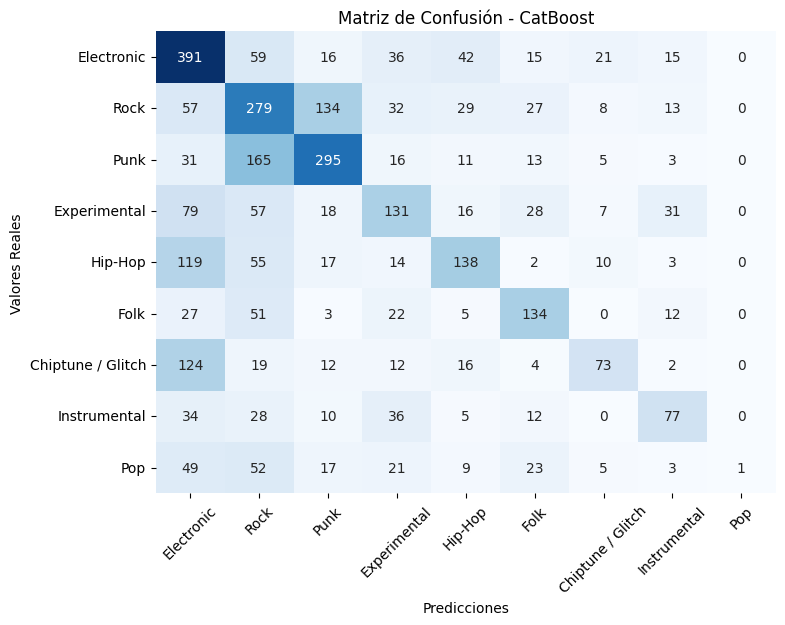

In [ ]:
catboost.fit(X_train_scaled, y_train)

pred_catboost = catboost.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_catboost))
print(metrics.classification_report(y_test, pred_catboost))

# Matriz de confusión
cm_catboost = metrics.confusion_matrix(y_test, pred_catboost)

# Graficar la Matriz de Confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=genre_labels, yticklabels=genre_labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - CatBoost")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor visualización
plt.yticks(rotation=0)

plt.show()

### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5)

cv_rf = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring="accuracy")

print("Accuracy en cada fold:", cv_rf)
print("Accuracy media:", cv_rf.mean())


Accuracy en cada fold: [0.41213938 0.4065193  0.43012364 0.4065193  0.42766117]
Accuracy media: 0.4165925561011177


Accuracy:  0.4301558752997602
              precision    recall  f1-score   support

         0.0       0.40      0.71      0.51       595
         1.0       0.34      0.45      0.39       579
         2.0       0.52      0.55      0.53       539
         3.0       0.40      0.32      0.36       367
         4.0       0.56      0.27      0.37       358
         5.0       0.49      0.50      0.50       254
         6.0       0.61      0.18      0.27       262
         7.0       0.48      0.33      0.39       202
         8.0       1.00      0.01      0.01       180

    accuracy                           0.43      3336
   macro avg       0.53      0.37      0.37      3336
weighted avg       0.49      0.43      0.41      3336



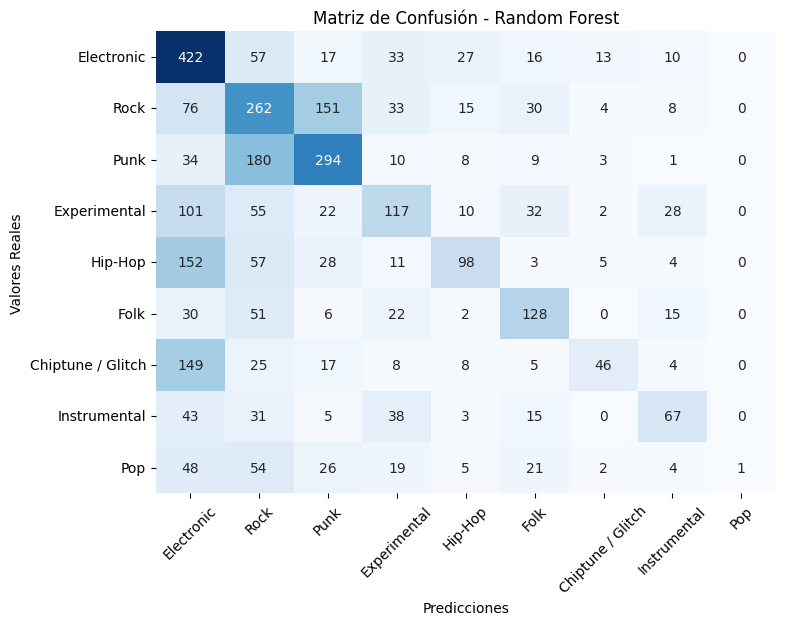

In [ ]:
rf.fit(X_train_scaled, y_train)

pred_rf = rf.predict(X_test_scaled)

print("Accuracy: ", metrics.accuracy_score(y_test, pred_rf))
print(metrics.classification_report(y_test, pred_rf))

cm_rf = metrics.confusion_matrix(y_test, pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=genre_labels, yticklabels=genre_labels)

plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()

### LightGBM

In [ ]:
d_train = lgb.Dataset(X_train_scaled, label=y_train)
d_test = lgb.Dataset(X_test_scaled, label=y_test)

params_1 = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "verbose": -1,
    "num_class":9,
    "class_weight": 'balanced'
}


model_lgb = lgb.train(params_1, d_train, valid_sets=[d_test], callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])


Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 1.54124
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 1.54124


Accuracy:  0.45083932853717024
              precision    recall  f1-score   support

         0.0       0.41      0.58      0.48       595
         1.0       0.37      0.44      0.40       579
         2.0       0.57      0.56      0.56       539
         3.0       0.43      0.41      0.42       367
         4.0       0.48      0.36      0.41       358
         5.0       0.53      0.56      0.54       254
         6.0       0.51      0.34      0.41       262
         7.0       0.44      0.40      0.42       202
         8.0       0.36      0.06      0.10       180

    accuracy                           0.45      3336
   macro avg       0.46      0.41      0.42      3336
weighted avg       0.45      0.45      0.44      3336



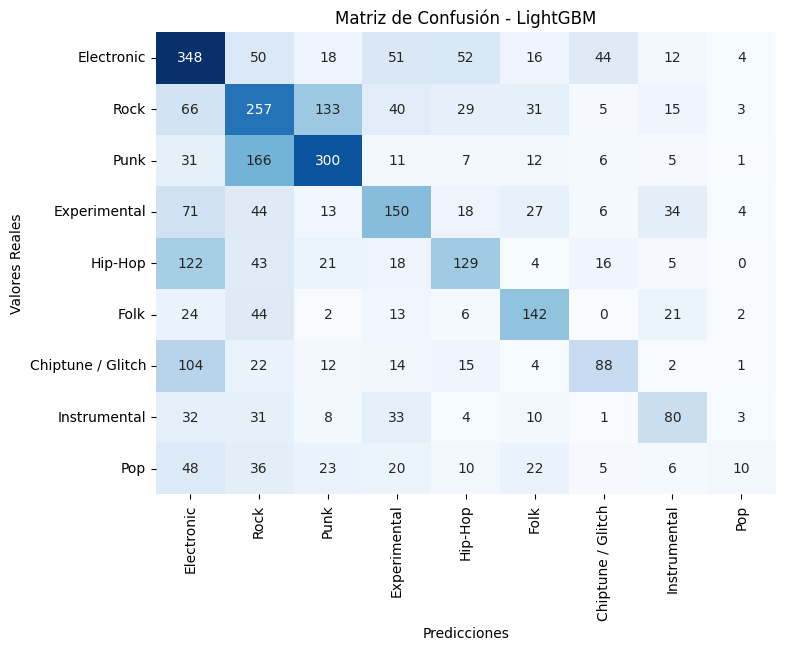

In [ ]:
preds_lgb = model_lgb.predict(X_test_scaled)
preds_multiclass_lgb = preds_lgb.argmax(axis=1)


# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, preds_multiclass_lgb))
print(metrics.classification_report(y_test, preds_multiclass_lgb))

# Matriz de confusión
cm_lgb = metrics.confusion_matrix(y_test, preds_multiclass_lgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels, yticklabels=genre_labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - LightGBM")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()



### PCA - RF

In [ ]:
pca_pipe = make_pipeline(StandardScaler(), PCA(), RandomForestClassifier())
param_grid = {
    "pca__n_components": [10, 15, 20],  # Número de componentes en PCA
    "randomforestclassifier__max_depth": [5, 10, 15],  # Profundidad máxima
    "randomforestclassifier__min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "randomforestclassifier__min_samples_leaf": [1, 2, 4],  # Mínimo de muestras por hoja
}

pipe_gs = GridSearchCV(estimator=pca_pipe, param_grid=param_grid, verbose=2, cv=3)

pipe_gs.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END pca__n_components=10, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2; total time=   2.0s
[CV] END pca__n_components=10, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2; total time=   2.1s
[CV] END pca__n_components=10, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=2; total time=   2.0s
[CV] END pca__n_components=10, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5; total time=   2.4s
[CV] END pca__n_components=10, randomforestclassifier__max_depth=5, randomforestclassifier__min_samples_leaf=1, randomforestclassifier__min_samples_split=5; total time=   2.7s
[CV] END pca__n_components=10, randomforestclassifier__max

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'pca__n_components': [10, 15, 20],
                         'randomforestclassifier__max_depth': [5, 10, 15],
                         'randomforestclassifier__min_samples_leaf': [1, 2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10]},
             verbose=2)

In [ ]:
best_gs = pipe_gs.best_estimator_

Accuracy:  0.44844124700239807
              precision    recall  f1-score   support

         0.0       0.39      0.64      0.49       595
         1.0       0.37      0.49      0.42       579
         2.0       0.56      0.58      0.57       539
         3.0       0.38      0.31      0.34       367
         4.0       0.54      0.35      0.43       358
         5.0       0.51      0.52      0.51       254
         6.0       0.64      0.29      0.40       262
         7.0       0.49      0.33      0.39       202
         8.0       0.83      0.03      0.05       180

    accuracy                           0.45      3336
   macro avg       0.52      0.39      0.40      3336
weighted avg       0.49      0.45      0.43      3336



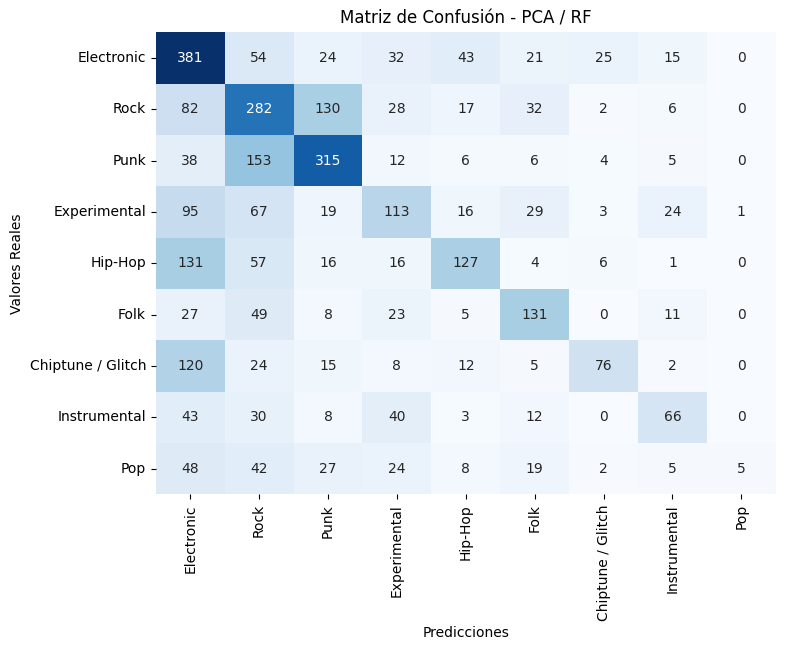

In [ ]:
pred_pipe = best_gs.predict(X_test)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_pipe))
print(metrics.classification_report(y_test, pred_pipe))


# Matriz de confusión
cm_pipe = metrics.confusion_matrix(y_test, pred_pipe)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels, yticklabels=genre_labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - PCA / RF")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/PCA.pkl"

pickle.dump(best_gs, open(filename, 'wb'))

### XGBoost

In [ ]:
model_xgb = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42
)


Accuracy:  0.4694244604316547
              precision    recall  f1-score   support

         0.0       0.42      0.60      0.50       595
         1.0       0.40      0.51      0.45       579
         2.0       0.62      0.61      0.61       539
         3.0       0.40      0.37      0.38       367
         4.0       0.51      0.41      0.45       358
         5.0       0.54      0.53      0.53       254
         6.0       0.56      0.31      0.40       262
         7.0       0.42      0.34      0.38       202
         8.0       0.45      0.10      0.16       180

    accuracy                           0.47      3336
   macro avg       0.48      0.42      0.43      3336
weighted avg       0.48      0.47      0.46      3336



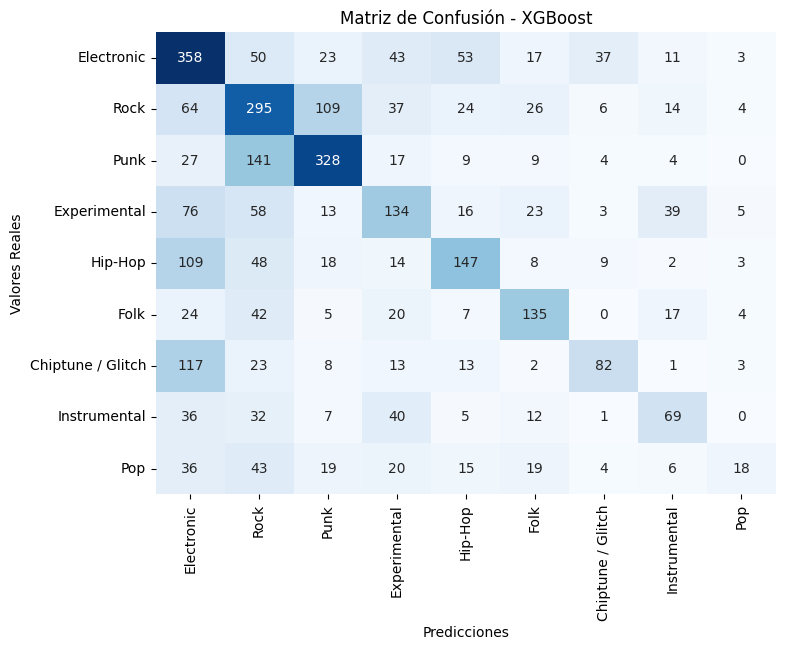

In [ ]:
model_xgb.fit(X_train_scaled, y_train)

# Hacer predicciones
pred_xgb = model_xgb.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_xgb))
print(metrics.classification_report(y_test, pred_xgb))

# Matriz de confusión
cm_xgb = metrics.confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels, yticklabels=genre_labels)

# Personalizar el gráfico
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


## Aproximación 2
Agrupacón por grandes generos.

Tal y como se observa en la anterior aproximación hay generos que se parecen entre si y se pueden agrupar formando nuevas categorias. Además, el pop por sus propias características se confunde con otros generos por lo que en siguientes aproximaciones no se utilizará este estilo.
También se eliminará el hip-hop por la misma razon ya que pueden utilizarse bases tanto de electronica como de rock para crear las canciones.

In [26]:
# Agrupar los generos en 4 grandes categorias

genre_mapping = {
    # 0 - Música Electrónica
    'Electronic': 0,
    'Ambient Electronic': 0,
    'Chiptune / Glitch': 0,


    # 1 - Musica Rock & derivados
    'Rock': 1,
    'Punk': 1,

    # 2 - Música Clásica & Tradicional
    'Classical': 2,
    'Old-Time / Historic': 2,

    # 3 - Folk, Soul, Blues & Country
    'Folk': 3,


    # Géneros descartado
    'Hip-Hop': None,
    'International': None,
    'Spoken': None,
    'Pop': None,
    'Instrumental': None,
    'Experimental': None,
    'Easy Listening': None,
    'Jazz': None,
    'Soul-RnB': None,
    'Blues': None,
    'Country': None

}

In [27]:
genre_labels_1 = [
    "Música Electrónica", "Musica Rock & derivados", "Música Clásica & Tradicional", "Folk"
]

In [28]:
df_2 = df.copy().drop(columns="genre_id")

In [29]:
df_2['genre'] = df_2['genre'].replace(genre_mapping).astype("Int32")
df_2 = df_2.dropna(subset=['genre'])


In [30]:
df_2["genre"].value_counts()

,count
genre,
1,5675
0,5046
3,1214
2,903


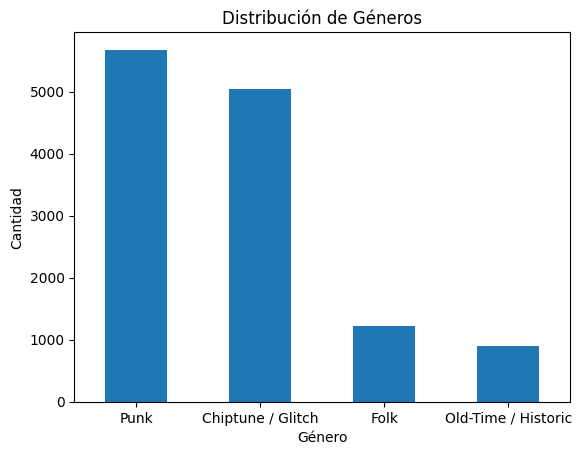

In [35]:
# Invertir el diccionario para mapear los números a los nombres
genre_labels = {v: k for k, v in genre_mapping.items()}

# Contar las ocurrencias por género numérico
genre_counts = df_2["genre"].value_counts()

# Reemplazar los números por nombres en el índice
genre_counts.index = genre_counts.index.map(genre_labels)

# Graficar
genre_counts.plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.title("Distribución de Géneros")
plt.show()


### Red Neuronal

In [ ]:
df_train = df_2[:round(len(df_2)*0.8)]
df_test = df_2[round(len(df_2)*0.8):]

In [ ]:
X_train_dl = df_train.drop(columns="genre")
y_train_dl = df_train["genre"]
X_test_dl = df_test.drop(columns="genre")
y_test_dl = df_test["genre"]

In [ ]:
y_train_dl = np.array(y_train_dl, dtype=np.int32)
y_test_dl = np.array(y_test_dl, dtype=np.int32)


In [ ]:
scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train_dl)
X_test_dl = scaler.transform(X_test_dl)

In [ ]:
X_train_dl, X_valid, y_train_dl, y_valid = train_test_split(X_train_dl, y_train_dl,test_size=0.2, random_state=41)


scaler = StandardScaler()
X_train_dl = scaler.fit_transform(X_train_dl)
X_valid = scaler.transform(X_valid)

In [ ]:
capas = [
    #keras.layers.Input((20)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 5, activation='softmax')
]

model_DL = keras.models.Sequential(capas)

In [ ]:
model_DL.compile(loss="sparse_categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="sgd")

In [ ]:
callbacks=[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

In [ ]:
# Entrenamiento del modelo
history = model_DL.fit(
    X_train_dl, y_train_dl,
    validation_data=(X_valid, y_valid),
    epochs=200,
    batch_size=388,
    verbose=1
)

Epoch 1/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4485 - loss: 1.5010 - val_accuracy: 0.5798 - val_loss: 1.3632
Epoch 2/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5981 - loss: 1.3140 - val_accuracy: 0.6256 - val_loss: 1.2221
Epoch 3/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6451 - loss: 1.1848 - val_accuracy: 0.6451 - val_loss: 1.1157
Epoch 4/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6635 - loss: 1.0828 - val_accuracy: 0.6636 - val_loss: 1.0341
Epoch 5/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6915 - loss: 1.0025 - val_accuracy: 0.6782 - val_loss: 0.9693
Epoch 6/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6968 - loss: 0.9444 - val_accuracy: 0.6918 - val_loss: 0.9171
Epoch 7/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7037 - loss: 0.9008 - val_accuracy: 0.7011 - val_loss: 0.8739
Epoch 8/200
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7112 - loss: 0.8606 - val_accuracy: 0.7084 - 

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy:  0.7667445482866043
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1035
           1       0.79      0.79      0.79      1078
           2       0.80      0.78      0.79       189
           3       0.65      0.49      0.56       266

    accuracy                           0.77      2568
   macro avg       0.75      0.72      0.73      2568
weighted avg       0.76      0.77      0.76      2568



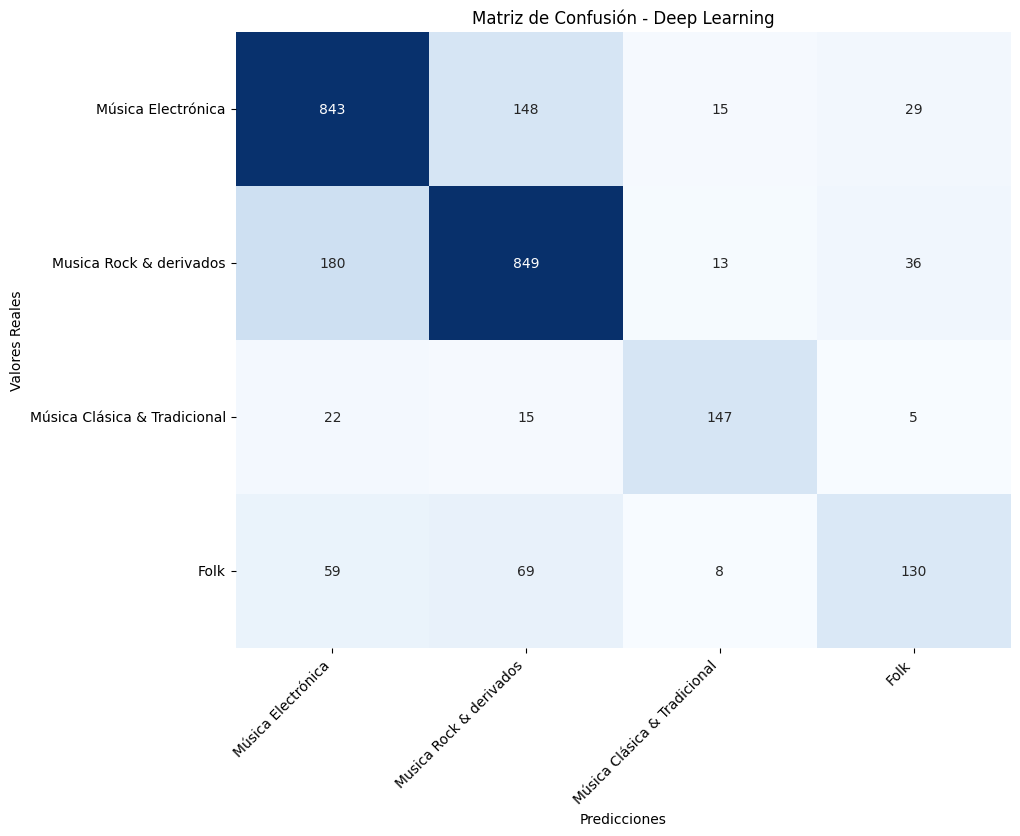

In [ ]:
# Hacer predicciones
pred_dl_proba = model_DL.predict(X_test_dl)
pred_dl = np.argmax(pred_dl_proba, axis=1)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test_dl, pred_dl))
print(metrics.classification_report(y_test_dl, pred_dl))

# Matriz de confusión
cm_dl = metrics.confusion_matrix(y_test_dl, pred_dl)

# Graficar matriz de confusión con nombres de géneros
plt.figure(figsize=(10, 8))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - Deep Learning")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.show()

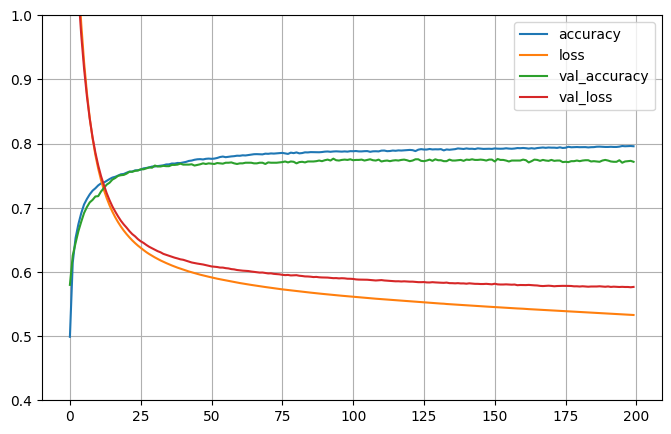

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/dl_model.pkl"

pickle.dump(model_DL, open(filename, 'wb'))

### XGBoost



In [ ]:
# Definir X e y
X = df_2.drop(columns=["genre"])
y = df_2["genre"]

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(10270, 20)
(2568, 20)
(10270,)
(2568,)


In [ ]:

# Definir el modelo XGBoost para clasificación multiclase
model_xgb_1 = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42
)


Accuracy:  0.7994548286604362
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1011
         1.0       0.82      0.84      0.83      1107
         2.0       0.85      0.84      0.85       200
         3.0       0.71      0.49      0.58       250

    accuracy                           0.80      2568
   macro avg       0.79      0.75      0.76      2568
weighted avg       0.80      0.80      0.80      2568



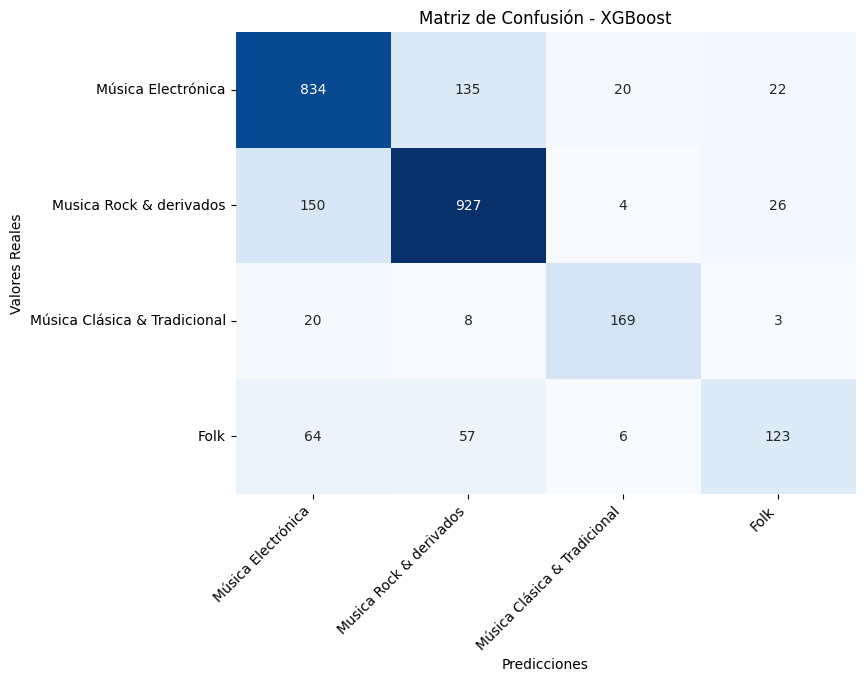

In [ ]:
model_xgb_1.fit(X_train_scaled, y_train)

# Hacer predicciones
pred_xgb_1 = model_xgb_1.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_xgb_1))
print(metrics.classification_report(y_test, pred_xgb_1))

# Matriz de confusión
cm_xgb_1 = metrics.confusion_matrix(y_test, pred_xgb_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - XGBoost")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/xgboost_agrupado_model.pkl"

pickle.dump(model_xgb_1, open(filename, 'wb'))

### LightGBM

In [ ]:
d_train = lgb.Dataset(X_train_scaled, label=y_train)
d_test = lgb.Dataset(X_test_scaled, label=y_test)

params_2 = {
    "objective": "multiclass",
    "metric": "multi_logloss",
    "boosting_type": "gbdt",
    "learning_rate": 0.05,
    "num_leaves": 31,
    "max_depth": -1,
    "verbose": -1,
    "num_class":4,
    "class_weight": 'balanced'
}


model_lgb_1 = lgb.train(params_2, d_train, valid_sets=[d_test], callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)])


Training until validation scores don't improve for 50 rounds
[100]	valid_0's multi_logloss: 0.54057
Did not meet early stopping. Best iteration is:
[98]	valid_0's multi_logloss: 0.540444


Accuracy:  0.7990654205607477
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      1011
         1.0       0.82      0.84      0.83      1107
         2.0       0.83      0.82      0.83       200
         3.0       0.71      0.52      0.60       250

    accuracy                           0.80      2568
   macro avg       0.79      0.75      0.77      2568
weighted avg       0.80      0.80      0.80      2568



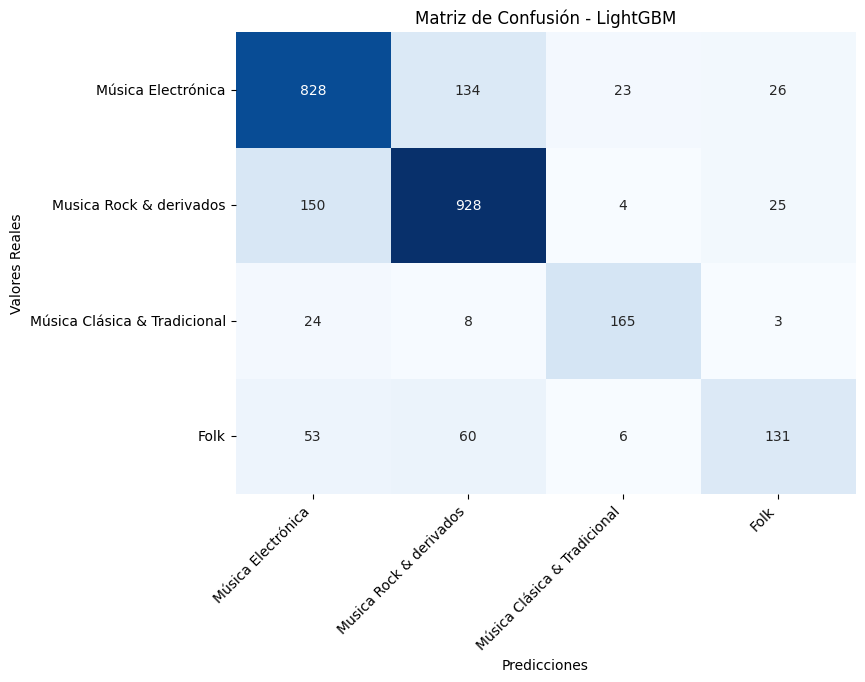

In [ ]:
preds_lgb_1 = model_lgb_1.predict(X_test_scaled)
preds_multiclass_lgb_1 = preds_lgb_1.argmax(axis=1)


# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, preds_multiclass_lgb_1))
print(metrics.classification_report(y_test, preds_multiclass_lgb_1))

# Matriz de confusión
cm_lgb_1 = metrics.confusion_matrix(y_test, preds_multiclass_lgb_1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgb_1, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - LightGBM")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")

plt.show()



In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/lightgbm_agrupado_model.pkl"

pickle.dump(preds_lgb_1, open(filename, 'wb'))

### RF - GS

In [ ]:
estimator = RandomForestClassifier()
param_grid_1 = {
    "max_depth": [10, 15, 20],  # Profundidad máxima
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Mínimo de muestras por hoja
}

rf_gs = GridSearchCV(estimator=estimator, param_grid=param_grid_1, verbose=2, cv=3)

rf_gs.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   5.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   4.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5; total time=   3.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   3.0s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10; total time=   3.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   3.0s
[CV] END max_depth=10, 

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [ ]:
best_gs = rf_gs.best_estimator_

Accuracy:  0.7862149532710281
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      1011
         1.0       0.82      0.83      0.82      1107
         2.0       0.83      0.82      0.83       200
         3.0       0.71      0.45      0.55       250

    accuracy                           0.79      2568
   macro avg       0.78      0.73      0.75      2568
weighted avg       0.78      0.79      0.78      2568



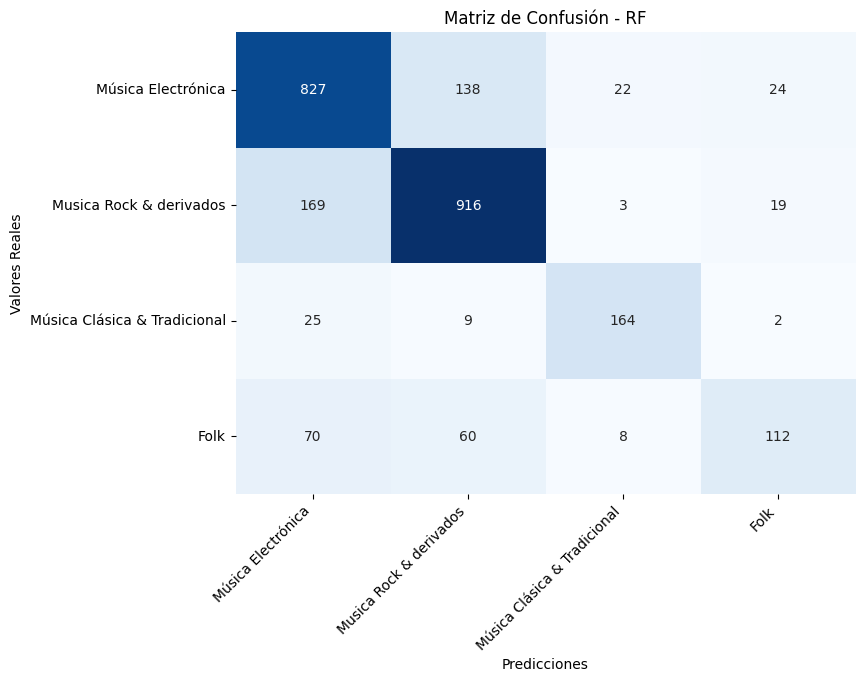

In [ ]:
pred_rf = best_gs.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_rf))
print(metrics.classification_report(y_test, pred_rf))


# Matriz de confusión
cm_rf = metrics.confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - RF")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.show()

In [ ]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/rf_agrupado_model.pkl"

pickle.dump(best_gs, open(filename, 'wb'))

## Aproximación 3
Balanceo de clases

In [9]:
df_3 = df.copy().drop(columns="genre_id")
df_3['genre'] = df_3['genre'].replace(genre_mapping).astype("Int32")
df_3 = df_3.dropna(subset=['genre'])
df_3["genre"].value_counts()

,count
genre,
1,5675
0,5046
3,1214
2,903


### Undersampling

In [49]:
# Definir X e y
X = df_3.drop(columns=["genre"])
y = df_3["genre"]

In [50]:

# Definir el undersampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Aplicar el undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Ver el balance después del undersampling
print("Distribución después del undersampling:", Counter(y_resampled))


Distribución después del undersampling: Counter({0: 903, 1: 903, 2: 903, 3: 903})


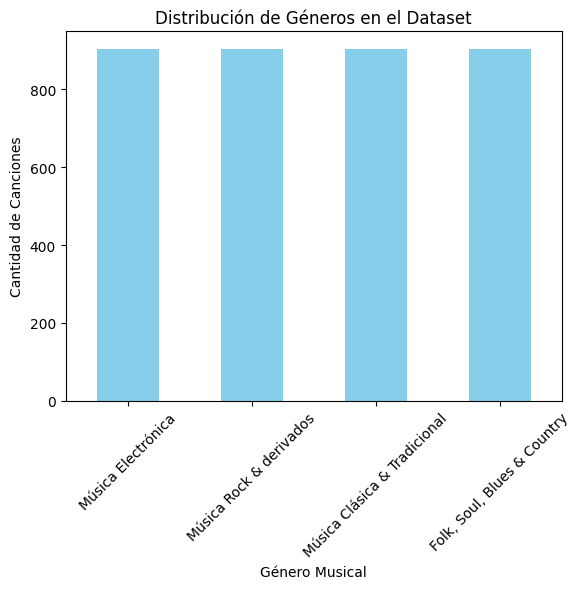

In [51]:
import matplotlib.pyplot as plt

# Crear un diccionario para mapear los valores numéricos a sus etiquetas generales
genre_labels = {
    0: "Música Electrónica",
    1: "Música Rock & derivados",
    2: "Música Clásica & Tradicional",
    3: "Folk, Soul, Blues & Country"
}

# Contar la cantidad de cada categoría en la columna 'genre'
genre_counts = pd.Series(y_resampled).value_counts()

# Reemplazar los números por nombres de las categorías generales
genre_counts.index = genre_counts.index.map(genre_labels)

# Graficar
genre_counts.plot(kind="bar", color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Género Musical")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de Géneros en el Dataset")
plt.show()


In [13]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(2889, 20)
(723, 20)
(2889,)
(723,)


In [16]:

# Definir el modelo XGBoost para clasificación multiclase
model_xgb_2 = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42
)


Accuracy:  0.7856154910096819
              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76       187
         1.0       0.73      0.71      0.72       177
         2.0       0.90      0.92      0.91       189
         3.0       0.73      0.74      0.74       170

    accuracy                           0.79       723
   macro avg       0.78      0.78      0.78       723
weighted avg       0.78      0.79      0.79       723



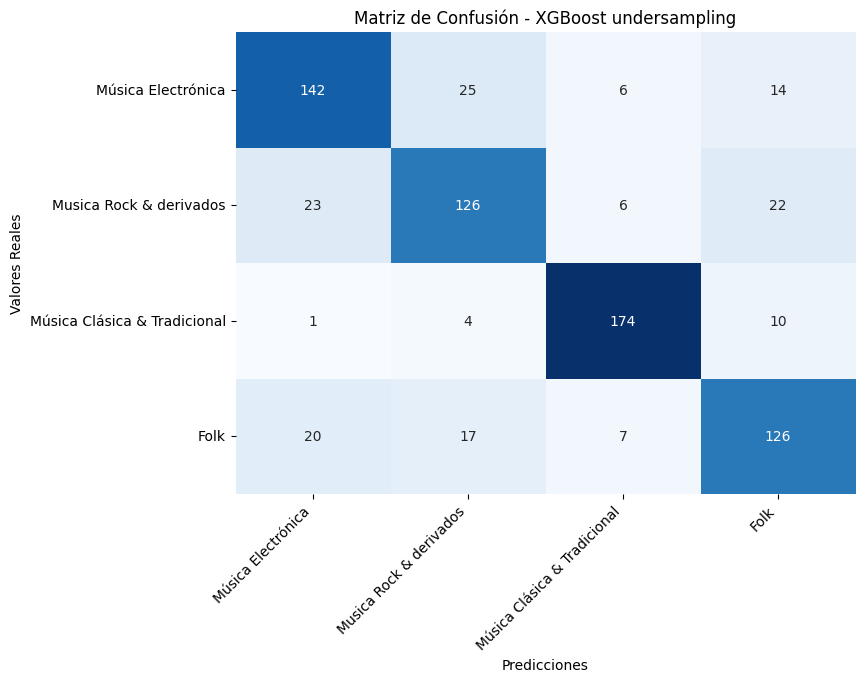

In [17]:
model_xgb_2.fit(X_train_scaled, y_train)

# Hacer predicciones
pred_xgb_2 = model_xgb_2.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_xgb_2))
print(metrics.classification_report(y_test, pred_xgb_2))

# Matriz de confusión
cm_xgb_2 = metrics.confusion_matrix(y_test, pred_xgb_2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_2, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - XGBoost undersampling")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.show()


In [24]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/xgboost_undersampled_model.pkl"

pickle.dump(model_xgb_2, open(filename, 'wb'))

### Oversampling

In [52]:
# Definir X e y
X = df_3.drop(columns=["genre"])
y = df_3["genre"]

In [53]:

# Definir el oversampler
oversampler = SMOTE(sampling_strategy='auto', random_state=42)

# Aplicar el oversampling
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Ver la distribución de clases después del oversampling
print("Distribución después del oversampling:", Counter(y_resampled))


Distribución después del oversampling: Counter({1: 5675, 3: 5675, 2: 5675, 0: 5675})


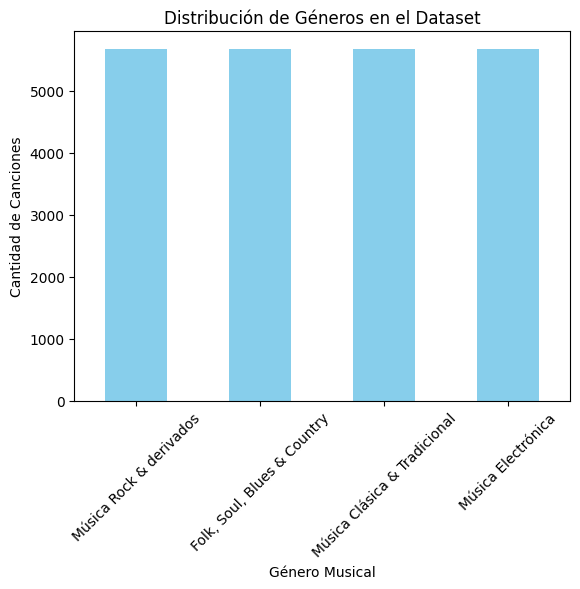

In [54]:
import matplotlib.pyplot as plt

# Crear un diccionario para mapear los valores numéricos a sus etiquetas generales
genre_labels = {
    0: "Música Electrónica",
    1: "Música Rock & derivados",
    2: "Música Clásica & Tradicional",
    3: "Folk, Soul, Blues & Country"
}

# Contar la cantidad de cada categoría en la columna 'genre'
genre_counts = pd.Series(y_resampled).value_counts()

# Reemplazar los números por nombres de las categorías generales
genre_counts.index = genre_counts.index.map(genre_labels)

# Graficar
genre_counts.plot(kind="bar", color="skyblue")
plt.xticks(rotation=45)
plt.xlabel("Género Musical")
plt.ylabel("Cantidad de Canciones")
plt.title("Distribución de Géneros en el Dataset")
plt.show()


In [21]:
# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=41)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Escalar los datos
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(18160, 20)
(4540, 20)
(18160,)
(4540,)


In [22]:

# Definir el modelo XGBoost para clasificación multiclase
model_xgb_3 = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=10,
    min_child_weight=3,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0,
    reg_lambda=1,
    objective='multi:softmax',
    num_class=4,
    eval_metric='mlogloss',
    random_state=42
)


Accuracy:  0.8799559471365639
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1194
         1.0       0.85      0.78      0.82      1128
         2.0       0.96      0.98      0.97      1113
         3.0       0.89      0.93      0.91      1105

    accuracy                           0.88      4540
   macro avg       0.88      0.88      0.88      4540
weighted avg       0.88      0.88      0.88      4540



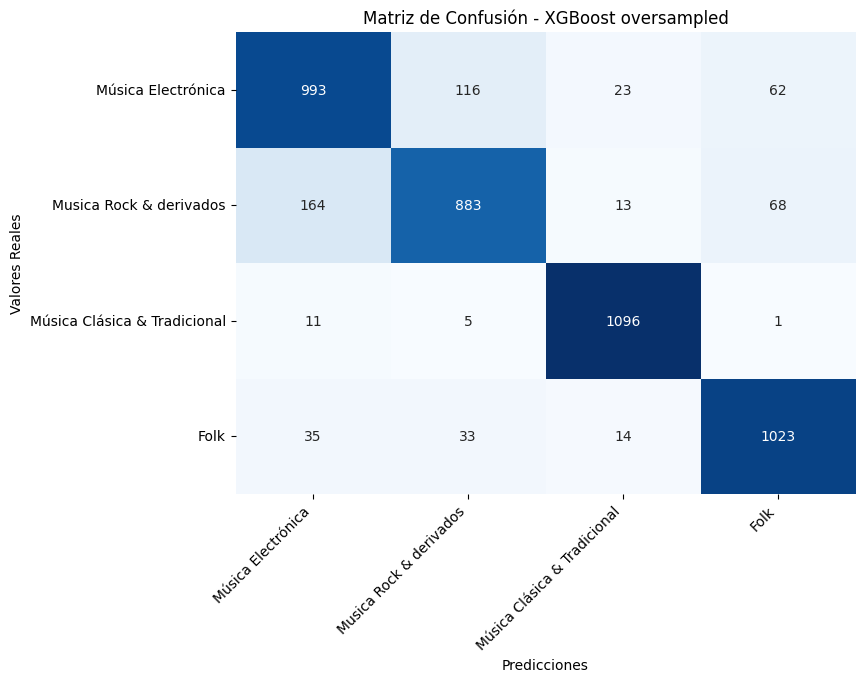

In [23]:
model_xgb_3.fit(X_train_scaled, y_train)

# Hacer predicciones
pred_xgb_3 = model_xgb_3.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy: ", metrics.accuracy_score(y_test, pred_xgb_3))
print(metrics.classification_report(y_test, pred_xgb_3))

# Matriz de confusión
cm_xgb_3 = metrics.confusion_matrix(y_test, pred_xgb_3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_3, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=genre_labels_1, yticklabels=genre_labels_1)

# Personalizar el gráfico
plt.title("Matriz de Confusión - XGBoost oversampled")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.xticks(rotation=45, ha="right")
plt.show()


In [25]:
filename = "/content/drive/MyDrive/Bootcamp_DS/ML/xgboost_oversampled_model.pkl"

pickle.dump(model_xgb_3, open(filename, 'wb'))